# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# (a) Load data (features)
def load_data():
    data = np.load('features.npy')
    means=data.mean(axis=0)
    stds=data.std(axis=0)
    for i in range(len(data[0])):
        for j in range(len(data)):
            data[j][i] = (data[j][i]-means[i])/stds[i]
    return data

In [3]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    Covariance_Matrix = np.cov(X.T)
    eigen_values, eigen_vectors = np.linalg.eig(Covariance_Matrix)
    idx = eigen_values.argsort()[::-1]   
    sorted_eig_vals = eigen_values[idx]
    sorted_eig_vecs = eigen_vectors[:,idx]
    return (sorted_eig_vals, sorted_eig_vecs)


In [4]:
# (c) Evaluate using variance_explained as the metric
def eval(X):
    explainability=[]
    for i in range(len(X[0])):
        explainability.append(X[0][i]/np.sum(X[0]))
    explain=0
    store=[]
    plt.figure(figsize=(5,5))
    for i in range(len(explainability)):
        explain+=explainability[i]
        store.append(explain)
    plt.plot(store)
    plt.title('Variance_Explained')
    plt.xlabel('Components')
    plt.ylabel('Variance')
    return explainability

In [5]:
# (d) Visualize after projecting to 2-D space
def viz(U,X,labels):
    z=U@X.T
    plt.figure(figsize=(5,5))
    ones=[]
    zeros=[]
    twos=[]
    for i in range(len(labels)):
        if labels[i]==1:
            ones.append(i)
        if labels[i]==0:
            zeros.append(i)
        if labels[i]==2:
            twos.append(i)
    plt.scatter(z[0][zeros],z[1][zeros],color='blue',label='label 0')
    plt.scatter(z[0][ones],z[1][ones],color='orange',label='label 1')
    plt.scatter(z[0][twos],z[1][twos],color='green',label='label 2')
    plt.legend();

Mean of the data is -0.00
Standard Deviation of the data is 1.00


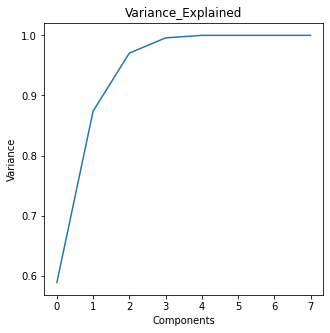

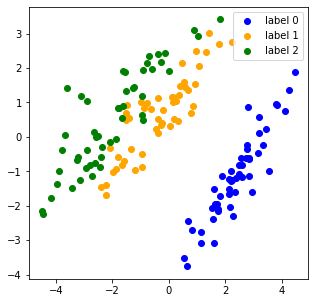

In [6]:
def main():
    df=load_data()
    labels= np.load('labels.npy',allow_pickle=True)
    print(f'Mean of the data is {df.mean():.2f}')
    print(f'Standard Deviation of the data is {df.std():.2f}')
    
    decomp = eigendecomp(df)
    evaluate = eval(decomp)
    first_component = decomp[1][:,0]
    second_component = decomp[1][:,1]
    reduced_U = np.array([first_component, second_component])
    viz(reduced_U,df,labels)

if __name__ == "__main__":
    main()

(e): Assume you have a dataset with the original dimensionality as 2 and you have to reduce it to 1. Provide a sample scatter plot of the original data (less than 10 datapoints) where PCA might produce misleading results. You can plot it by hand and then take a picture. In the next cell, switch to Markdown mode and use the command: ![title](<your_plot_file_path>)

This happens when the data has 0 skewness and 0 curtosis. This makes the data have no component which will be beneficial for the model to reduce the data in. This can be the case of a simple circle.

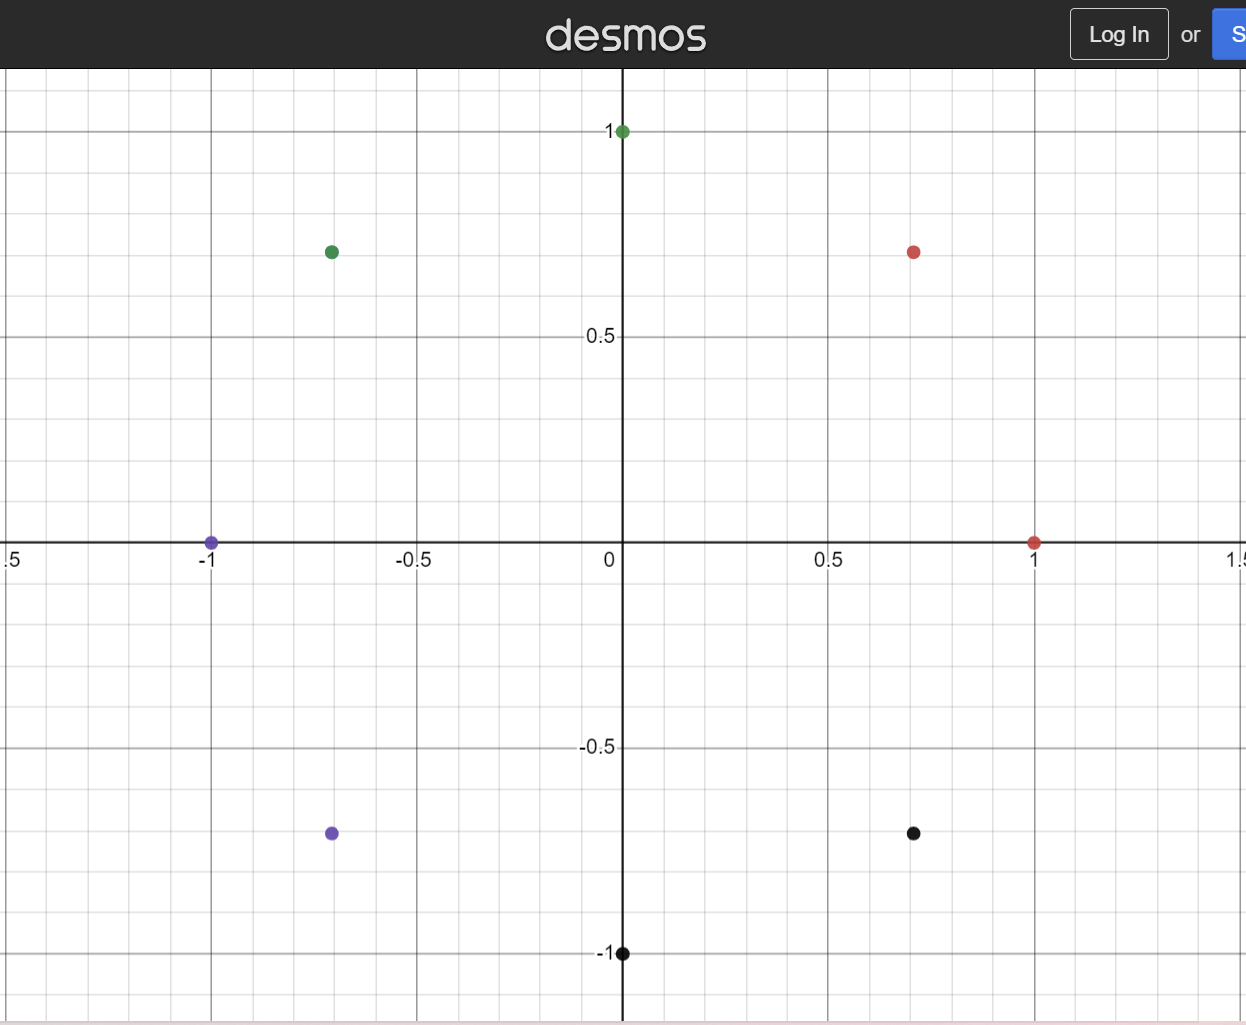